# <center> <h1>  👨‍💻 

                    🔴                                        🔴                        
                            🟡                                                          
                    🟢             🟢                        🟢            🟢                        
                            🟠            ⚫️                         🟠         ⚫️             
                    🔵             ⚪️                                       
                            🟣                                        🟣
                    🟤                                        🟤
                    
                    Without Dropout                              With Dropout

In [1]:
import tensorflow as tf
from keras.utils import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout, InputLayer
import matplotlib.pyplot as plt

# <center> `Overfitting`
### Overfitting - Overfitting is one of the problems of deep neural networks, which consists of the following: the model explains well only the examples in the training set, it is prone to many errors in the classification of examples that did not participate in the training process sets, so that the model fits only the training examples. That is, in the training process, our accuracy level remains 100%, but in the test process, we get a very low result.

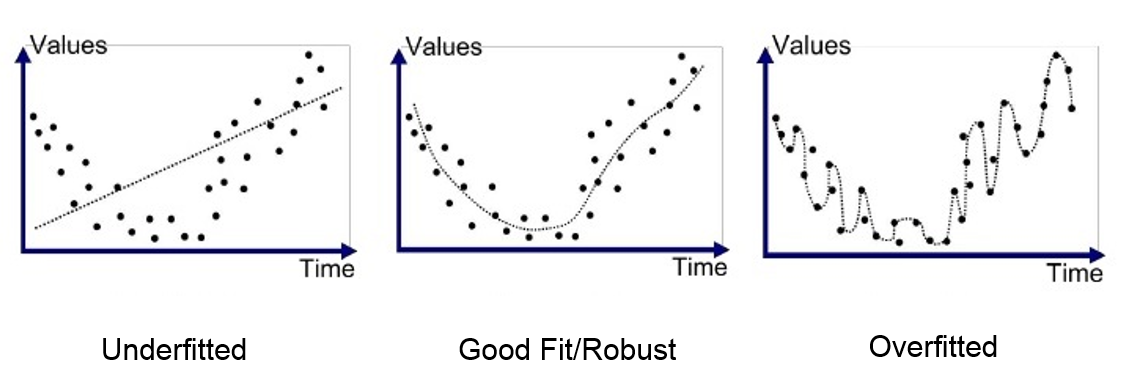

### Many solutions to the problem of overfitting have been proposed in recent years, but one of them stands out from the others due to its simplicity and excellent practical results. This solution is called Dropout.

* ### Dropout turns off a certain percentage (for example, 30%) of random neurons in different iterations (epochs) during neural network training. This helps us to avoid overfitting our weights during training.

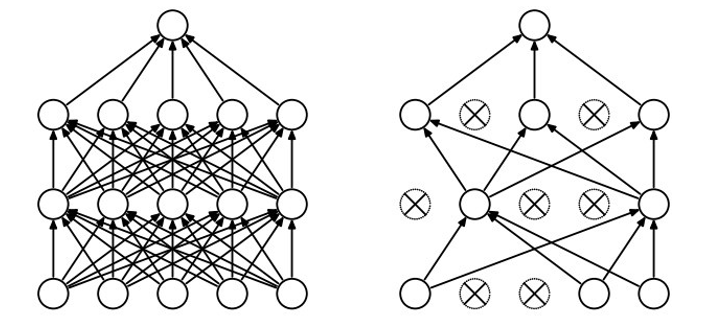

                     1-picture. A simple neural network.              2-picture. A neural network with dropout
                         

### Dropout is `primarily` used in the ANN layer. But it can also be used in CNN layer. In the CNN layer, Dropout sets one or more channels of the image to 0. But through this we can lose the features we need. `That's why it's better to use Dropout only in the ANN layer.`

# <center> We have a dataset of leaves and we use Dropout on this dataset to see the differences

In [2]:
train_data_dir = "Datasets/Bean_Dataset__/train"
test_data_dir = "Datasets/Bean_Dataset__/test"

In [3]:
# we can read the dataset
train_data = image_dataset_from_directory(train_data_dir, image_size=(224,224), batch_size=16)
test_data = image_dataset_from_directory(test_data_dir, image_size=(224,224), batch_size=16)

Found 642 files belonging to 3 classes.
Found 150 files belonging to 3 classes.


In [16]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
list(train_data)

[(<tf.Tensor: shape=(16, 224, 224, 3), dtype=float32, numpy=
  array([[[[1.23267380e+02, 9.81199722e+01, 6.56425400e+01],
           [1.11924820e+02, 8.88082733e+01, 5.78665504e+01],
           [1.15256538e+02, 9.41761780e+01, 6.74172516e+01],
           ...,
           [1.35609619e+02, 1.09609619e+02, 8.26096191e+01],
           [1.40721802e+02, 1.13721794e+02, 8.47217941e+01],
           [1.40728241e+02, 1.13728249e+02, 8.47282486e+01]],
  
          [[1.30531479e+02, 1.05531494e+02, 7.45314941e+01],
           [1.26528221e+02, 1.03528221e+02, 7.25282211e+01],
           [1.33412216e+02, 1.09448822e+02, 8.14610138e+01],
           ...,
           [1.44833893e+02, 1.18753540e+02, 9.17535400e+01],
           [1.51933899e+02, 1.22320129e+02, 9.41913834e+01],
           [1.59353287e+02, 1.28830734e+02, 1.00830734e+02]],
  
          [[1.30767059e+02, 1.07767067e+02, 7.57670670e+01],
           [1.37324692e+02, 1.12268738e+02, 8.10958252e+01],
           [1.47382965e+02, 1.22135437e+02, 9

In [19]:
len(list(train_data))
#There are 41 batches, each batch contains 16 pictures

41

In [20]:
list(train_data)[0]
# 0-bacth

(<tf.Tensor: shape=(16, 224, 224, 3), dtype=float32, numpy=
 array([[[[1.03776627e+02, 6.77766266e+01, 5.17766266e+01],
          [1.03045120e+02, 6.60451202e+01, 4.90000000e+01],
          [1.11924507e+02, 7.49740143e+01, 5.58255005e+01],
          ...,
          [8.89812393e+01, 6.41143799e+01, 3.05478096e+01],
          [8.81969070e+01, 6.21969032e+01, 2.70098724e+01],
          [8.70264740e+01, 6.12630081e+01, 2.35534019e+01]],
 
         [[1.02666374e+02, 6.76663742e+01, 4.86663742e+01],
          [1.08415894e+02, 7.34158936e+01, 5.36964302e+01],
          [1.15154182e+02, 7.90145950e+01, 5.72970352e+01],
          ...,
          [9.17502365e+01, 6.66698837e+01, 3.55091782e+01],
          [8.86828918e+01, 6.35541496e+01, 2.38116302e+01],
          [1.00888702e+02, 7.58887024e+01, 3.49822083e+01]],
 
         [[1.03272720e+02, 7.14334335e+01, 5.01923637e+01],
          [1.02839287e+02, 6.80803604e+01, 4.80000000e+01],
          [1.07893814e+02, 7.28199081e+01, 5.08199120e+01],
    

In [21]:
list(train_data)[0][0][0]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[ 85.80747  ,  67.65569  ,  26.722736 ],
        [106.38863  ,  86.77257  ,  53.956314 ],
        [ 54.61615  ,  34.68431  ,  10.116949 ],
        ...,
        [193.33197  , 178.76868  , 139.11366  ],
        [189.54832  , 166.91908  , 130.97736  ],
        [165.15009  , 140.38222  , 104.301865 ]],

       [[ 94.216034 ,  85.99283  ,  20.453362 ],
        [ 88.091835 ,  75.326294 ,  30.530773 ],
        [ 97.41501  ,  80.47098  ,  53.027817 ],
        ...,
        [181.19734  , 168.04556  , 132.031    ],
        [167.81148  , 148.37914  , 104.94679  ],
        [189.49104  , 167.64284  , 120.9464   ]],

       [[104.31258  , 104.99681  ,   6.8214254],
        [ 77.491714 ,  69.23844  ,   9.015232 ],
        [ 99.025276 ,  82.54313  ,  46.462772 ],
        ...,
        [198.44344  , 186.36955  , 147.566    ],
        [ 73.468155 ,  48.46811  ,  15.079402 ],
        [ 83.46367  ,  54.575687 ,  20.338648 ]],

       ...,

     

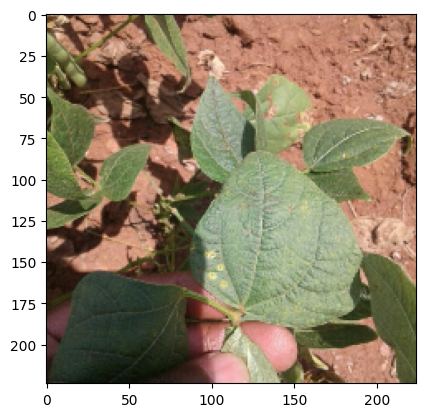

In [23]:
plt.imshow(list(train_data)[0][0][0].numpy().astype("uint8"))

In [42]:
list(train_data)[0][0][0].shape

TensorShape([224, 224, 3])

In [25]:
classes = train_data.class_names
classes

['angular_leaf_spot', 'bean_rust', 'healthy']

In [26]:
list(train_data)[0]

(<tf.Tensor: shape=(16, 224, 224, 3), dtype=float32, numpy=
 array([[[[1.08017700e+02, 1.75401627e+02, 3.79373398e+01],
          [1.20574303e+02, 1.85622696e+02, 4.81100159e+01],
          [1.13737801e+02, 1.77957748e+02, 4.56135979e+01],
          ...,
          [3.31915665e+01, 1.06757317e+02, 0.00000000e+00],
          [3.85578003e+01, 1.07648026e+02, 8.45539188e+00],
          [3.56116791e+01, 1.03464272e+02, 1.89153023e+01]],
 
         [[1.03996735e+02, 1.69148529e+02, 1.76038742e+01],
          [1.21029655e+02, 1.84461975e+02, 3.55310936e+01],
          [1.21785477e+02, 1.81104507e+02, 4.20857811e+01],
          ...,
          [5.72345314e+01, 1.33407440e+02, 7.80058026e-01],
          [4.56799660e+01, 1.18247635e+02, 4.16823959e+00],
          [3.37104797e+01, 1.03174751e+02, 9.79511070e+00]],
 
         [[9.00665665e+01, 1.49664764e+02, 4.03085136e+00],
          [9.92356415e+01, 1.55833847e+02, 1.58841658e+01],
          [8.58590469e+01, 1.38376892e+02, 8.64628315e+00],
    

In [36]:
list(train_data)[0][1]
#classes

<tf.Tensor: shape=(16,), dtype=int32, numpy=array([0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 1, 1])>

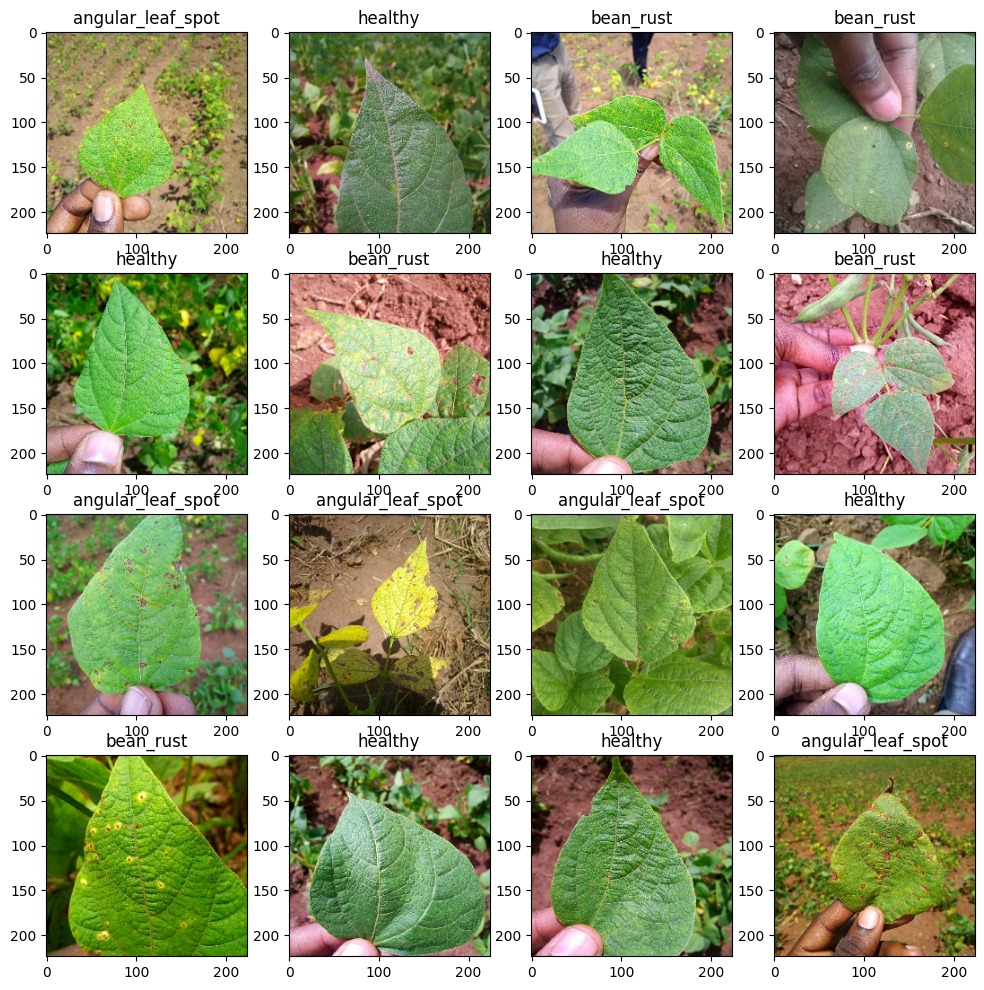

In [37]:
plt.figure(figsize=(12,12))
for image, label in train_data.take(1):
    
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.title(classes[label[i]])
        plt.imshow(image[i].numpy().astype("uint8"))
    

# <center> Without Dropout 

In [4]:
model_without_dropout = Sequential([
    InputLayer((224,224,3)),
    
    Conv2D(32, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),   #112x112x32
    
    Conv2D(64, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),   #56x56x64
    
    Flatten(),
    
    Dense(128, activation="relu"),
    Dense(3, activation="softmax")
    
])

In [5]:
model_without_dropout.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [6]:
model_without_dropout.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [7]:
model_without_dropout.fit(train_data, epochs=10)

Epoch 1/10
41/41 [==============================] - 6s 52ms/step - loss: 236.9043 - accuracy: 0.3956
Epoch 2/10
41/41 [==============================] - 2s 46ms/step - loss: 0.7296 - accuracy: 0.6916
Epoch 3/10
41/41 [==============================] - 2s 46ms/step - loss: 0.3343 - accuracy: 0.8754
Epoch 4/10
41/41 [==============================] - 2s 46ms/step - loss: 0.1779 - accuracy: 0.9439
Epoch 5/10
41/41 [==============================] - 2s 46ms/step - loss: 0.0539 - accuracy: 0.9829
Epoch 6/10
41/41 [==============================] - 2s 46ms/step - loss: 0.0135 - accuracy: 0.9969
Epoch 7/10
41/41 [==============================] - 2s 46ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 8/10
41/41 [==============================] - 2s 46ms/step - loss: 7.7192e-04 - accuracy: 1.0000
Epoch 9/10
41/41 [==============================] - 2s 46ms/step - loss: 2.9153e-04 - accuracy: 1.0000
Epoch 10/10
41/41 [==============================] - 2s 46ms/step - loss: 1.6743e-04 - accuracy: 1.

### In our model above, we did not apply dropout and ended up with Overfitting at epochs 8-9-10.

# <center> With Dropout

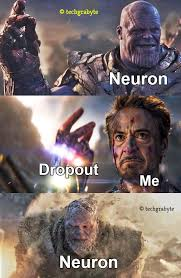

In [8]:
model_with_dropout = Sequential([
    InputLayer((224,224,3)),
    
    Conv2D(32, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),   #112x112x32
    
    Conv2D(64, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),   #56x56x64
    
    Flatten(),
    Dropout(0.5), 
    
    Dense(128, activation="relu"),
    Dropout(0.5),
    
    Dense(3, activation="softmax")
    
])

In [9]:
model_with_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 200704)            0         
                                                                 
 dropout (Dropout)           (None, 200704)           

In [69]:
model_with_dropout.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])


In [70]:
model_with_dropout.fit(train_data,epochs=10)

Epoch 1/10
41/41 [==============================] - 3s 48ms/step - loss: 182.6805 - accuracy: 0.4081
Epoch 2/10
41/41 [==============================] - 2s 49ms/step - loss: 0.9697 - accuracy: 0.5249
Epoch 3/10
41/41 [==============================] - 2s 48ms/step - loss: 0.8044 - accuracy: 0.6340
Epoch 4/10
41/41 [==============================] - 2s 48ms/step - loss: 0.6451 - accuracy: 0.7601
Epoch 5/10
41/41 [==============================] - 2s 48ms/step - loss: 0.6132 - accuracy: 0.7368
Epoch 6/10
41/41 [==============================] - 2s 48ms/step - loss: 0.4296 - accuracy: 0.8240
Epoch 7/10
41/41 [==============================] - 2s 48ms/step - loss: 0.3964 - accuracy: 0.8396
Epoch 8/10
41/41 [==============================] - 2s 48ms/step - loss: 0.3793 - accuracy: 0.8583
Epoch 9/10
41/41 [==============================] - 2s 48ms/step - loss: 0.2665 - accuracy: 0.8972
Epoch 10/10
41/41 [==============================] - 2s 48ms/step - loss: 0.1882 - accuracy: 0.9190


### <center> So after applying dropout, we avoided overfitting at least a little bit.😁

# <center> <h1> 👨‍💻   🚀  